<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/06_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this notebook we will use K Nearest Neighbors algorithm on [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) dataset, to classify the iris flowers into {setosa,versicolor,verginica} based on 4 features

*   Sepal length
*   Sepal width
*   Petal length
*   Petal width

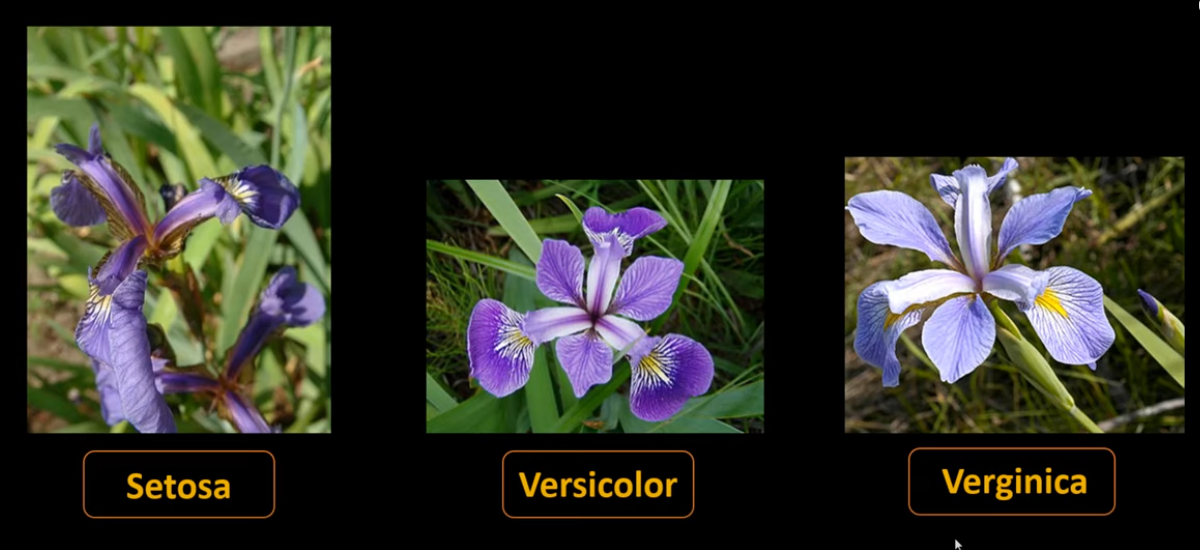


## Working of K-Nearest Neighbors classifier
* k-Nearest Neighbors (k-NN) predicts new data points by finding the k closest examples in the training data based on distance calculations.
* For classification, it assigns the most common class among these k neighbors, while for regression it averages their values.
*  The algorithm requires choosing an appropriate value of k and works best when features are scaled to similar ranges.
*  It's simple and intuitive but can be computationally expensive since it stores all training data and calculates distances to every point during prediction.

In [82]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()

In [83]:
iris.feature_names #inpput dimensions

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [84]:
iris.target_names #classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [85]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [86]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [88]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [89]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [90]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

Sepal length vs Sepal Width (Setosa vs Versicolor)

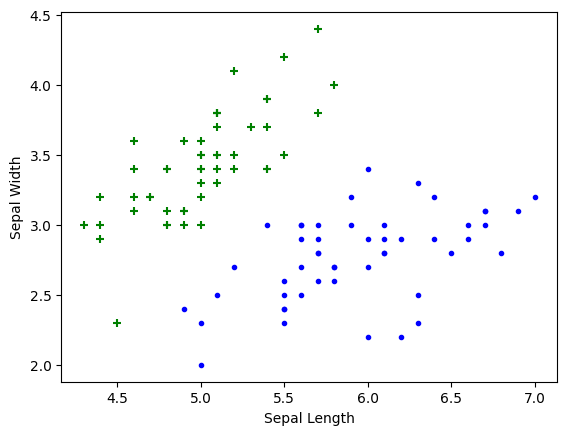

In [91]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

Petal length vs Pepal Width (Setosa vs Versicolor)
*  This helps to visualise KNN better, as we can see a iris flower of type 1 category (marked by red dot) is closer to k category 1 neighbors
* Similarly flower of cat2 is closer to cat2 flower data points
* But an iris flower from df3 is far from both cat1 and cat2 flower data points
* In absence of df3 data points its nearest neighbors would be cat2 points hence it will be classified as cat2 flower, otherwise Knn will be of type cat3 hence it will be classified as category 3 iris flower.
* Classifying based on smallest distance makes it easier to visualise

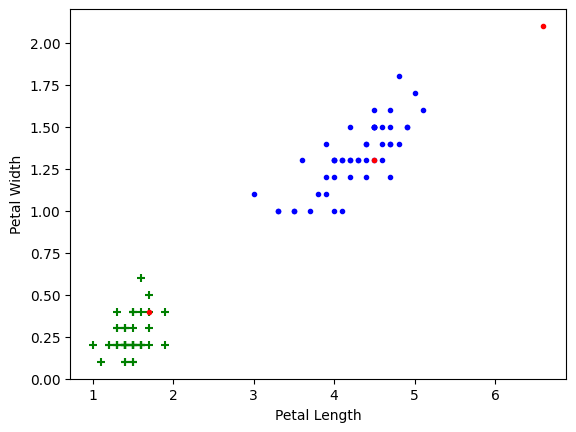

In [92]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')
plt.scatter(df0['petal length (cm)'][5],df0['petal width (cm)'][5],color="red",marker='.')
plt.scatter(df1['petal length (cm)'][55],df1['petal width (cm)'][55],color="red",marker='.')
plt.scatter(df2['petal length (cm)'][105],df2['petal width (cm)'][105],color="red",marker='.')

Train test split

In [93]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.flower_name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
len(X_train), len(X_test)

(120, 30)

KNN classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
knn.score(X_test, y_test)

1.0

In [96]:
knn.predict(X_test.iloc[[29]])

array([np.str_('virginica')], dtype=object)

In [97]:
y_test.iloc[[29]]

,flower_name
146,virginica


In [98]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

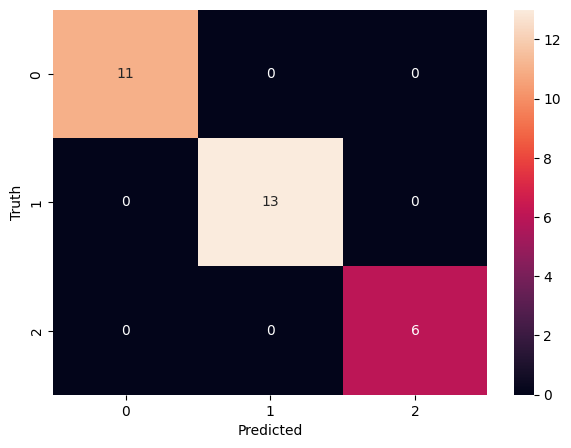

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

